**Note**: Sử dụng SVM thay thế KNN so với ver1 và dùng kịch bản gridsearch kết hợp SVM và RandomForest đạt 0.94 (Tốt hơn ver 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nguồn dataset: [Mobile Price Classification](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv)

# 1.Import package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 2.Đọc dữ liệu và thống kê mô tả

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/train.csv')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


+ Đây là bộ dữ liệu về thông tin các tính năng của điện thoại di động khác nhau. 
+ Bộ dữ liệu gồm 20 biến đầu vào và 1 biến mục tiêu, trong biến đầu vào có 13 biến numeric và 7 biến category

1.battery_power: Tổng năng lượng mà pin có thể lưu trữ trong một giờ được tính bằng mAh (numeric)

2.blue: Có bluetooth hay không (có = 1, không = 0) (category) 

3.clock_speed: tốc độ mà bộ vi xử lý thực hiện các lệnh (numeric)

4.dual_sim: Có hỗ trợ sim kép hay không (có = 1, không = 0) (category) 

5.fc: số mega pixels camera trước (numeric)

6.four_g: Có mạng 4G (có = 1, không = 0) (category) 

7.int_memory: dung lượng bộ nhớ trong Gigabytes (numeric)

8.m_dep: chiều sâu của điện thoại tính theo cm (numeric)

9.mobile_wt: trọng lượng (numeric)

10.n_cores: Số lõi của bộ xử lý (category)

11.pc: số mega pixels camera chính (numeric)

12.px_height: Chiều cao độ phân giải pixel (numeric)

13.px_width: Chiều rộng độ phân giải pixel (numeric)

14.ram: Bộ nhớ truy cập ngẫu nhiên tính bằng Mega Byte (numeric)

15.sc_h: Chiều cao màn hình của điện thoại di động tính bằng cm (numeric)

16.sc_w: Chiều rộng màn hình của điện thoại di động tính bằng cm (numeric)

17.talk_time: thời gian dài nhất mà một lần sạc pin sẽ kéo dài (numeric)

18.three_g: Có mạng 3G (có = 1, không = 0) (category) 

19.touch_screen: Có màn hình cảm ứng hay không (có = 1, không = 0) (category) 

20.wifi: Có bắt wifi được không (có = 1, không = 0) (category) 

21.price_range: Đây là biến mục tiêu có giá trị 0 (chi phí thấp), 1 (chi phí trung bình), 2 (chi phí cao) và 3 (chi phí rất cao).

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


-Nhìn vào mean, không tính **price_range** ta thấy **ram** cao nhất là 2124.2 và
**blue** thấp nhất là 0.495

-Có sự chênh lệch lớn ở đây nên ta cần chuẩn hóa trước khi xây dựng mô hình

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

-Bộ dữ liệu không có missing value

# 3.Visuallize distribution

number of numeric field:  13


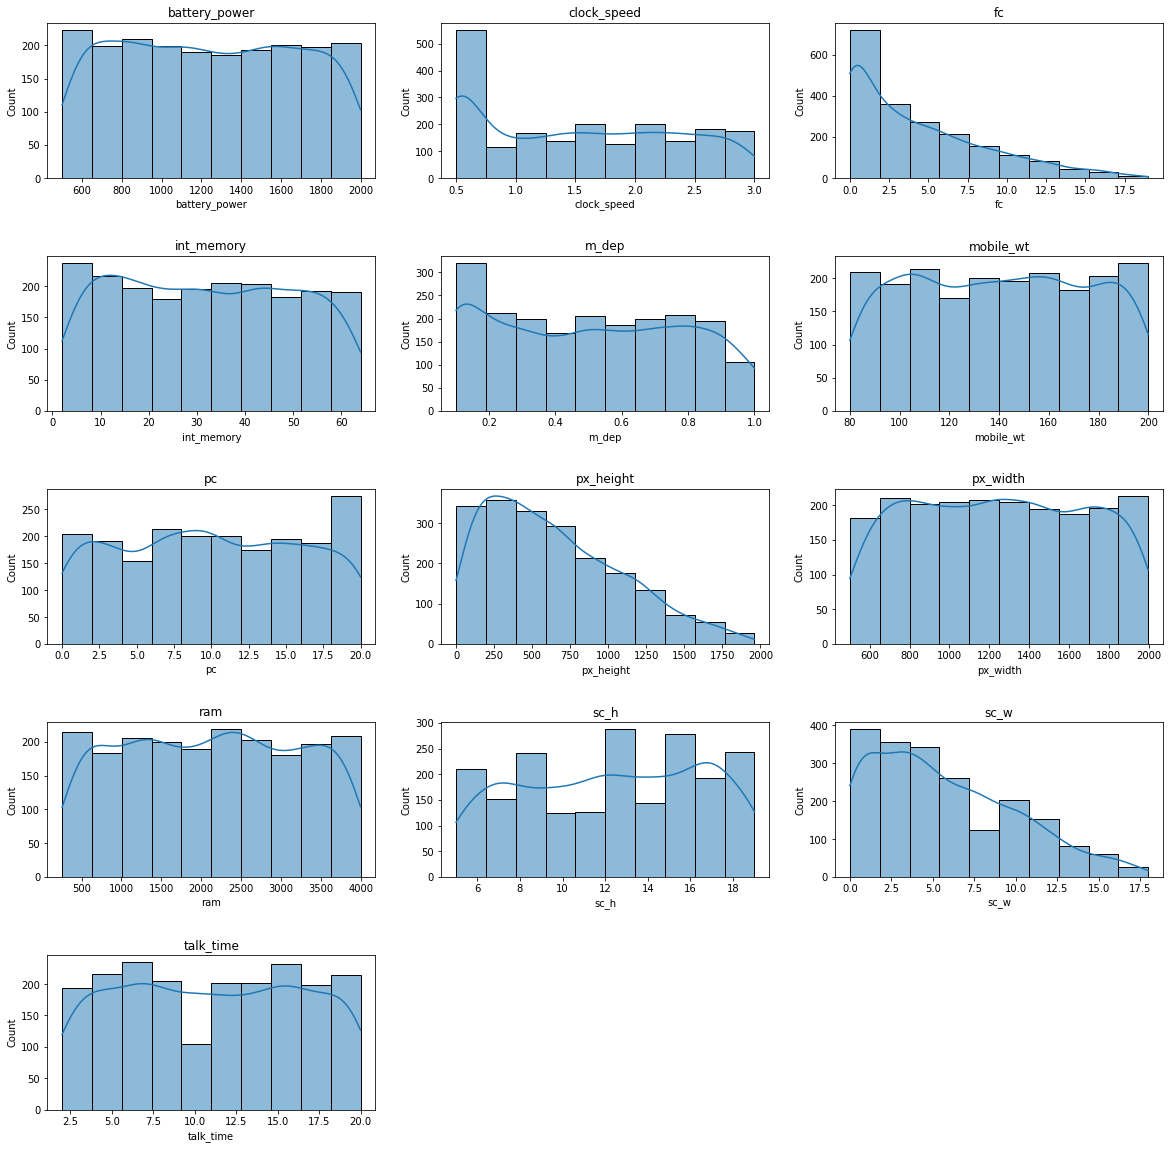

In [ ]:
#Đối với biến liên tục

numeric_cols = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height',
                'px_width','ram','sc_h','sc_w','talk_time']

def _plot_numeric_classes(col, bins=5, kde=True):
    sns.histplot(train[col],
                 bins = bins,
                 kde = kde)

def _distribution_numeric(numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):

    print('number of numeric field: ', len(numeric_cols)) 
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        break

_distribution_numeric(numeric_cols, row=5, col=3, figsize=(20, 20), bins = 10)

-Biến fc, px_height, sc_w đều giảm dần

number of category field:  7


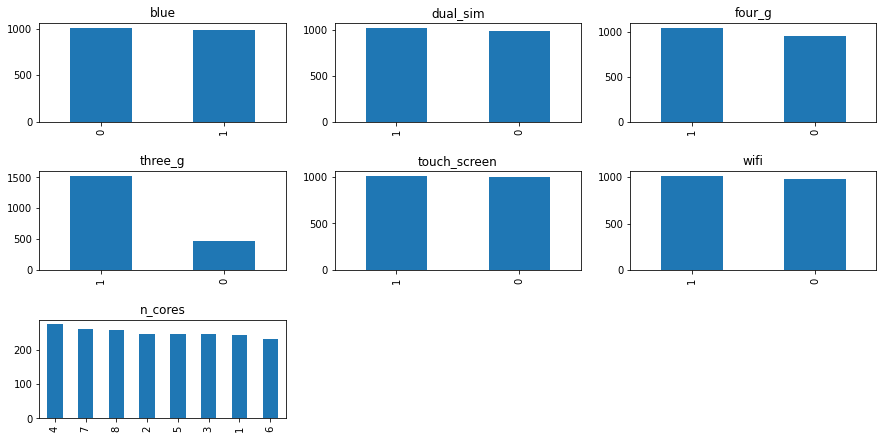

In [ ]:
#Đối với biến phân loại
cate_cols = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','n_cores']

def _plot_bar_classes(cate_cols):
  train[cate_cols].value_counts().plot.bar(figsize=(15,10))

def _distribution_cate(cate_cols, row , col , figsize = (20, 15)):

  print('number of category field: ', len(cate_cols)) 

  plt.figure(figsize = figsize) 
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)   
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(cate_cols, row = 4, col = 3, figsize = (20, 15))

-Hầu như các biến đều cân bằng ngoại lệ biến three_g có sự chênh lệch lớn.

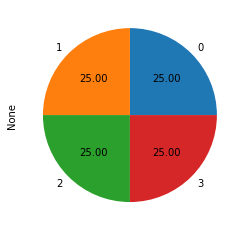

In [ ]:
train.groupby('price_range').size().plot(kind='pie', autopct='%.2f')

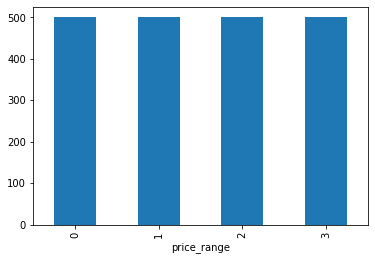

In [ ]:
train.groupby('price_range').size().plot(kind='bar')

-Bộ dữ liệu cân bằng giữa 4 nhãn 0,1,2,3 của biến mục tiêu nên ta có thể dùng thang đo Accuracy để đánh giá.

+ Visuallize 1 vài phân phối khác:

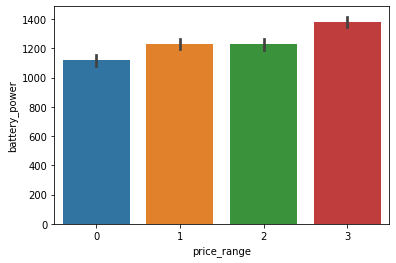

In [ ]:
sns.barplot(x = 'price_range', y = 'battery_power', data=train)

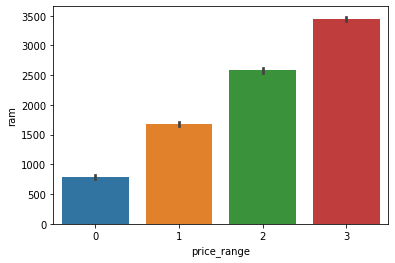

In [ ]:
sns.barplot(x = 'price_range', y = 'ram',data=train)

-Vẽ biểu đồ tương quan giữa các biến

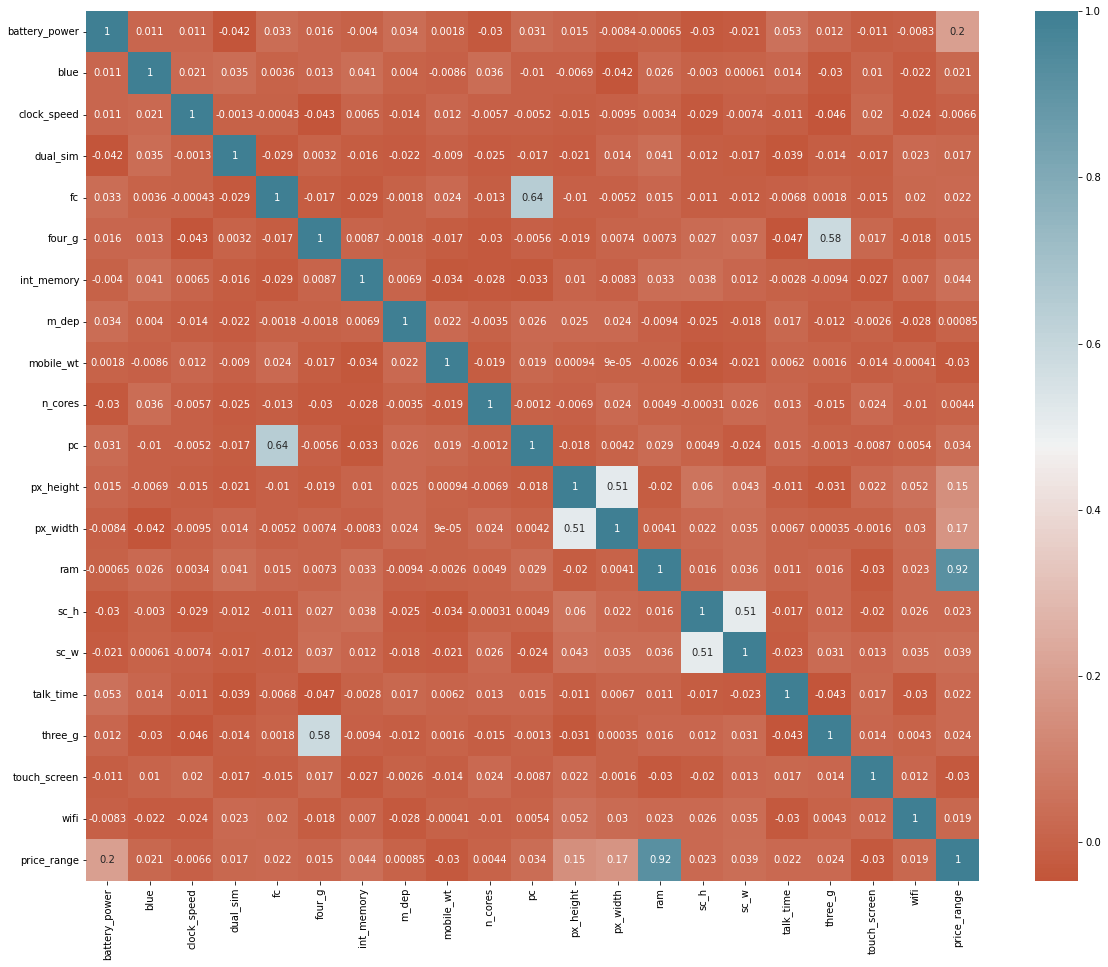

In [ ]:
plt.figure(figsize=(20, 16))
correlation = train.corr()
sns.heatmap(train.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

-Biến ram tương quan rất cao với biến mục tiêu price_range (0.92)

-fc tương quan với pc : 0.64

-three_g và four_g, px_height và px_width lần lượt tương quan là 0.58, 0.51

# 4.Tiền xử lí dữ liệu

In [ ]:
df_train, df_val = train_test_split(train, test_size=0.2, stratify = train['price_range'])
X_train = df_train.copy()
y_train = X_train.pop("price_range")

X_val = df_val.copy()
y_val = X_val.pop("price_range")
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(1600, 20) (1600,)
(400, 20) (400,)


In [ ]:
# Completed training pipeline
from sklearn.ensemble import RandomForestClassifier

completed_pl = Pipeline(
    steps=[
            ("preprocessor", MinMaxScaler()), 
            ("classifier", RandomForestClassifier())
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_val_pred = completed_pl.predict(X_val)
print(f"Accuracy on val: {accuracy_score(list(y_val), list(y_val_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on val: 0.88


+ Mô hình có độ chính xác trên tập train là 100%, trên tập val là 88% cho thấy có hiện tượng Overfitting. Ta sẽ đi xử lí bằng cross-validation.

# 5.Đánh giá chéo (Cross-validation)

In [ ]:
# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Xác định metric cho mô hình
metric = make_scorer(accuracy_score)
# Đánh giá mô hình
scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Accuracy: 0.872 0.026


-Như vậy độ chính xác trung bình là 0.872 và độ lệch 0.026 là không quá lớn nên có thể chấp nhận được.

In [ ]:
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_val, y_val_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.95      0.94       100
     class 1       0.82      0.82      0.82       100
     class 2       0.83      0.83      0.83       100
     class 3       0.96      0.93      0.94       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



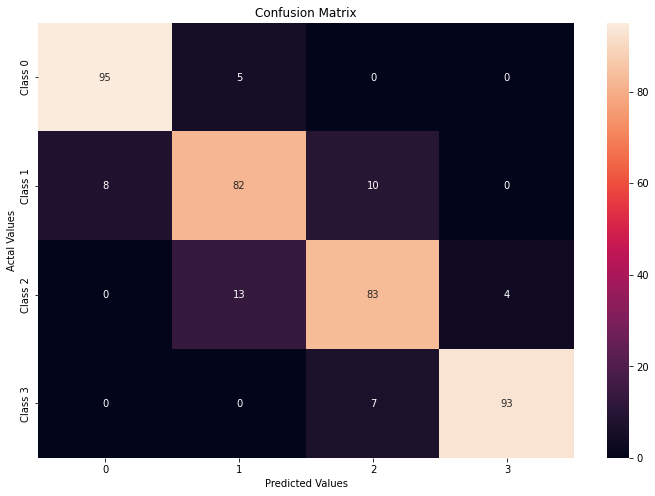

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Class 0','Class 1','Class 2','Class 3'], 
                     columns = ['0','1','2','3'])
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 6.Đánh giá trên nhiều mô hình

-Chúng ta có thể thực hiện vòng lặp để đánh giá chéo nhiều lớp mô hình khác nhau. Sau đó so sánh phân phối điểm thu được của những lớp mô hình này để tìm ra đâu là mô hình có score lớn nhất.

In [ ]:
# list các mô hình được lựa chọn
models = [GaussianNB(), GradientBoostingClassifier(), SVC(), MLPClassifier(), RandomForestClassifier()]

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", MinMaxScaler()), ("classifier", model)]
  )

  scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
  all_scores.append(scores)

-vẽ biểu đồ phân phối score giữa các mô hình.

Text(0.5, 1.0, 'Scores Metrics')

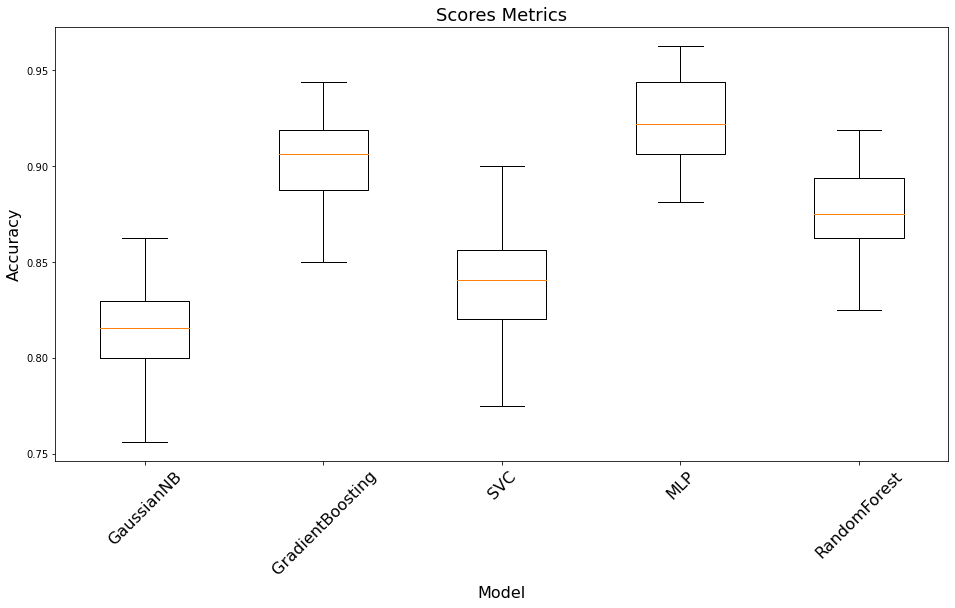

In [ ]:
import matplotlib.pyplot as plt
model_names = ['GaussianNB', ' GradientBoosting', 'SVC', 'MLP', 'RandomForest']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

-Ta thấy MLP và GradientBoosting là 2 thuật toán có độ chính xác cao , dao động lần lượt từ 0.88->0.96 và 0.85->0.94, với trung bình đều là 0.93.

-Ta sẽ thử đi GridSearch cho 2 thuật toán này.

# 7.GridSearch

-GridSearch với mô hình GradientBoosting

In [ ]:
gradient_boosting = GradientBoostingClassifier()

parameters = {
    'n_estimators' : [10, 20, 50, 100, 150, 200],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'max_depth' : [1, 2, 3]
}

grid_search_ada = GridSearchCV(gradient_boosting, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search_ada.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [10, 20, 50, 100, 150, 200]},
             verbose=1)

In [ ]:
print(grid_search_ada.best_estimator_)
print(grid_search_ada.best_params_)
grid_search_ada.best_score_

GradientBoostingClassifier(max_depth=2, n_estimators=150)
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}


0.9043749999999999

-GridSearch với mô hình MLP

In [ ]:
mlp = MLPClassifier()

parameters = {
    'random_state': [0, 5],
    'max_iter': [200, 300],
    'learning_rate': ('constant', 'invscaling', 'adaptive')
}

grid_search_mlp = GridSearchCV(mlp, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search_mlp.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'learning_rate': ('constant', 'invscaling',
                                           'adaptive'),
                         'max_iter': [200, 300], 'random_state': [0, 5]},
             verbose=1)

In [ ]:
print(grid_search_mlp.best_estimator_)
print(grid_search_mlp.best_params_)
grid_search_mlp.best_score_

MLPClassifier(random_state=0)
{'learning_rate': 'constant', 'max_iter': 200, 'random_state': 0}


0.653125

-Kết hợp với RandomForestClassifier

In [ ]:
from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestClassifier(),
  ):
      """
      A Custom BaseEstimator that can switch between classifiers.
      :param estimator: sklearn object - The classifier
      """ 
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("pre", MinMaxScaler()), ("clf", ClassifierSwitcher())]
)

------------Kịch bản với MLPClassifier------------

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [
    {
        'clf__estimator': [MLPClassifier()], 
        'clf__estimator__random_state': [0, 5],
        'clf__estimator__max_iter': [200, 300]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre', MinMaxScaler()),
                                       ('clf', ClassifierSwitcher())]),
             n_jobs=12,
             param_grid=[{'clf__estimator': [MLPClassifier(max_iter=300,
                                                           random_state=5)],
                          'clf__estimator__max_iter': [200, 300],
                          'clf__estimator__random_state': [0, 5]},
                         {'clf__estimator': [RandomForestClassifier()],
                          'clf__estimator__criterion': ('gini', 'entropy'),
                          'clf__estimator__max_depth': [5, 10],
                          'clf__estimator__n_estimators': [50, 100]}],
             return_train_score=True, scoring=make_scorer(accuracy_score),
             verbose=3)

In [ ]:
print(gscv.best_estimator_)
print(gscv.best_params_)
gscv.best_score_

Pipeline(steps=[('pre', MinMaxScaler()),
                ('clf',
                 ClassifierSwitcher(estimator=MLPClassifier(max_iter=300,
                                                            random_state=5)))])
{'clf__estimator': MLPClassifier(max_iter=300, random_state=5), 'clf__estimator__max_iter': 300, 'clf__estimator__random_state': 5}


0.91875

------------Kịch bản với SVC------------

In [ ]:
parameters = [
    {
        'clf__estimator': [SVC()], 
        'clf__estimator__kernel': ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'),
        'clf__estimator__degree': [2, 4],
        'clf__estimator__gamma': ('scale', 'auto')
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

gscv_2 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv_2.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "<ipython-input-50-f706636c398f>", line 16, in fit
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 217, in fit
    " Input is a {}x{} matr

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre', MinMaxScaler()),
                                       ('clf', ClassifierSwitcher())]),
             n_jobs=12,
             param_grid=[{'clf__estimator': [SVC(degree=2, kernel='linear')],
                          'clf__estimator__degree': [2, 4],
                          'clf__estimator__gamma': ('scale', 'auto'),
                          'clf__estimator__kernel': ('linear', 'poly', 'rbf',
                                                     'sigmoid',
                                                     'precomputed')},
                         {'clf__estimator': [RandomForestClassifier()],
                          'clf__estimator__criterion': ('gini', 'entropy'),
                          'clf__estimator__max_depth': [5, 10],
                          'clf__estimator__n_estimators': [50, 100]}],
             return_train_score=True, scoring=make_scorer(accuracy_score),
             verbose=3)

In [ ]:
print(gscv_2.best_estimator_)
print(gscv_2.best_params_)
gscv_2.best_score_

Pipeline(steps=[('pre', MinMaxScaler()),
                ('clf',
                 ClassifierSwitcher(estimator=SVC(degree=2, kernel='linear')))])
{'clf__estimator': SVC(degree=2, kernel='linear'), 'clf__estimator__degree': 2, 'clf__estimator__gamma': 'scale', 'clf__estimator__kernel': 'linear'}


0.9349999999999999

-Vậy ta sẽ dùng kịch bản của SVC đi dự báo tập test!

# 8.Dự báo trên tập test

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/test.csv', index_col = 0)
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0


In [ ]:
test['predict_price_range'] = gscv_2.predict(test)
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predict_price_range
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
